In [1]:
#Import required libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Load Data
file_loc = 'C:\\Users\\TJ\\Documents\\Denver\\GitHub\\TheZoen\\Data\\trial_last\\all.xlsx'
df = pd.read_excel(file_loc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210143 entries, 0 to 210142
Data columns (total 7 columns):
temp        210143 non-null float64
wind        210143 non-null float64
rain        210143 non-null float64
humi        210143 non-null float64
dew         210143 non-null float64
snow        210143 non-null float64
accident    210143 non-null int64
dtypes: float64(6), int64(1)
memory usage: 11.2 MB


In [4]:
df['accident'] = df['accident'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210143 entries, 0 to 210142
Data columns (total 7 columns):
temp        210143 non-null float64
wind        210143 non-null float64
rain        210143 non-null float64
humi        210143 non-null float64
dew         210143 non-null float64
snow        210143 non-null float64
accident    210143 non-null bool
dtypes: bool(1), float64(6)
memory usage: 9.8 MB


In [5]:
X = df.iloc[:,:6]
Y = df.accident
# X.head()
# Y.head()

In [6]:
#Splitting Data
#split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Optimization terminated successfully.
         Current function value: 0.274770
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.084     
Dependent Variable: accident         AIC:              80849.2691
Date:               2019-07-10 15:26 BIC:              80908.6623
No. Observations:   147100           Log-Likelihood:   -40419.   
Df Model:           5                LL-Null:          -44106.   
Df Residuals:       147094           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
         Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
temp     0.0030     0.0016      1.8920   0.0585   -0.0001    0.0061
wind     0.0638     0.0092      6.9318   0.0000    0.0458 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression
Accuracy : 0.9091096553146265
Score of K-fold Cross Validation :
 [0.91080897 0.90815772 0.91305235 0.91169273 0.91210061] 
Mean: 0.91 

Confusion Matrix : 
 [[134032      0]
 [ 13068      0]]

Classification Report


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       False       0.91      1.00      0.95    134032
        True       0.00      0.00      0.00     13068

    accuracy                           0.91    147100
   macro avg       0.46      0.50      0.48    147100
weighted avg       0.83      0.91      0.87    147100



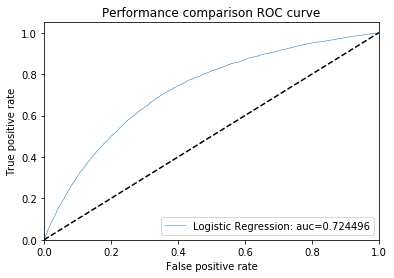

In [7]:
model = LogisticRegression()
name = 'Logistic Regression'
model.fit(X_train, Y_train)
logit_model=sm.Logit( Y_train,X_train)
result=logit_model.fit()
print(result.summary2())
    
pred = model.predict(X_test)
score = sklearn.metrics.accuracy_score(Y_test, pred)
    #열마다 T, F값 저장
preds = model.predict_proba(X_test)
pred = pd.Series(preds[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, pred)
auc_score = auc(fpr, tpr)
label = '%s: auc=%f' %(name, auc_score)
plt.plot(fpr, tpr, '-', linewidth = .5, label = label)

    #K-fold cross validation
cv = KFold(5, shuffle=True, random_state=0)
scores = cross_val_score(model, X_train, Y_train, cv=cv)
print(name)
print("Accuracy :", score )
print("Score of K-fold Cross Validation :\n", scores, "\nMean: {:.2f}".format(scores.mean()), "\n")


print("Confusion Matrix : \n",confusion_matrix(Y_train, model.predict(X_train)))


print("\nClassification Report")
print(classification_report(Y_train, model.predict(X_train)))


plt.legend(loc="lower right")
plt.title("Performance comparison ROC curve")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


    